# **Tensorflow V1**

In [7]:
import tensorflow as tf

## **Try**

Disable eager execution to use TensorFlow v1-style sessions

In [8]:
tf.compat.v1.disable_eager_execution()

Define a TensorFlow constant

In [9]:
x = tf.constant("Tensorflow")

Print the Tensor object (only its properties, not its value)

In [10]:
print(x)

Tensor("Const:0", shape=(), dtype=string)


Create a session in TensorFlow v1 compatibility mode

In [11]:
sess = tf.compat.v1.Session()

Run the session to evaluate the tensor 'x'

In [12]:
output = sess.run(x)

Print the actual value of 'x'

In [13]:
print(output)

b'Tensorflow'


Close the session properly

In [14]:
sess.close()

## **Add 2 numbers**

In [15]:
x = tf.constant(4)
y = tf.constant(10)

In [16]:
z = tf.add(x,y)

In [17]:
z

<tf.Tensor 'Add:0' shape=() dtype=int32>

In [18]:
print(z)

Tensor("Add:0", shape=(), dtype=int32)


In [19]:
sess = tf.compat.v1.Session()

In [20]:
output = sess.run(z)

In [21]:
output

np.int32(14)

In [22]:
print(output)

14


In [23]:
sess.close()

Open a session to run the computation

In [24]:
with tf.compat.v1.Session() as sess:
    output = sess.run(z)
    print(output)

14


## **Matrix Multiplication**

In [25]:
import numpy as np

In [26]:
# Create two 1D arrays (vectors) using numpy
var1 = np.arange(1, 13, dtype=np.int32)  # Creates an array [1, 2, ..., 12]
var2 = np.arange(15, 27, dtype=np.int32) # Creates an array [15, 16, ..., 26]

In [27]:
# Print arrays (Optional Debugging Step)
print(var1)  # Output: [1, 2, ..., 12]
print(var2)  # Output: [15, 16, ..., 26]

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[15 16 17 18 19 20 21 22 23 24 25 26]


In [28]:
# Reshape the numpy arrays into matrices
# var1 is reshaped into a 3x4 matrix
mat1 = tf.constant(var1, shape=[3, 4])

In [29]:
# var2 is reshaped into a 4x3 matrix
mat2 = tf.constant(var2, shape=[4, 3])

In [30]:
# Perform matrix multiplication (mat1 * mat2)
res = tf.matmul(mat1, mat2)

In [31]:
# Print the Tensor object (metadata, not actual value)
print(res)  # Output: <tf.Tensor 'MatMul:0' shape=(3,3) dtype=int32>

Tensor("MatMul:0", shape=(3, 3), dtype=int32)


In [32]:
# Open a session to execute the matrix multiplication
with tf.compat.v1.Session() as sess:
    # Compute the result
    output = sess.run(res)

    # Print the actual resulting matrix
    print(output)

# No need to manually close the session since 'with' statement manages it

[[210 220 230]
 [522 548 574]
 [834 876 918]]


## **Task**

add , sub , multi , divide

In [33]:
v1 = tf.constant([1,2,3,4])
v2 = tf.constant([6,7,8,9])

Res

In [34]:
a = tf.add(v1,v2)
s = tf.subtract(v1,v2)
m = tf.multiply(v1,v2)
d = tf.divide(v1,v2)

with tf.compat.v1.Session() as sess:
  print(sess.run(a))
  print(sess.run(s))
  print(sess.run(m))
  print(sess.run(d))

[ 7  9 11 13]
[-5 -5 -5 -5]
[ 6 14 24 36]
[0.16666667 0.28571429 0.375      0.44444444]


##  **Linear Regression using TF**

y = wx +b

In [35]:
# Generate random input data
x_data = np.random.randn(4, 9)  # Input features (4 samples, 9 features)
w_data = np.random.randn(9, 1)  # Weights (9 features, 1 output)
b_data = np.zeros(4)            # Bias (4 samples, 1 bias each)

In [36]:
# Define TensorFlow constants for computation
x = tf.constant(x_data, shape=[4, 9])  # Input matrix (4x9)
w = tf.constant(w_data, shape=[9, 1])  # Weight matrix (9x1)
b = tf.constant(b_data, shape=[4, 1])  # Bias vector (4x1)

In [37]:
# Linear regression formula: y = wx + b
y = tf.add(tf.matmul(x, w), b)  # Matrix multiplication (4x9) * (9x1) = (4x1), then add bias

In [38]:
# Print the Tensor object (metadata, not actual values)
print(y)  # Output: <tf.Tensor 'Add_2:0' shape=(4,1) dtype=float64>

Tensor("Add_2:0", shape=(4, 1), dtype=float64)


In [39]:
# Open a session to execute the computation
with tf.compat.v1.Session() as sess:
    # Compute and print the predicted values
    print(sess.run(y))

# No need to manually close the session since 'with' statement manages it

[[-1.87758258]
 [-0.6545835 ]
 [-3.12031863]
 [ 2.43864232]]


## **Variable**

In [40]:
var1 = tf.Variable(12, name="variable1")
var2 = tf.Variable(13, name="variable2")

In [41]:
# with tf.compat.v1.Session() as sess:
#   sess.run(var1)

initializer

In [42]:
init = tf.compat.v1.global_variables_initializer()

In [43]:
with tf.compat.v1.Session() as sess:
  sess.run(init)
  print(sess.run(var1))

12


## **Linear Regression using TF (Variable)**

**Task**

In [44]:
# [[1,2,3]] ---->> w
# [[3], [4], [4]] ---->> x
# 1 ------->> b

In [45]:
w = tf.Variable([[1,2,3]], shape=(1,3))
x = tf.constant([[3], [4], [4]], shape=(3,1))
b = tf.Variable(1)

In [46]:
res = tf.add(tf.matmul(w, x), b)

In [47]:
init = tf.compat.v1.global_variables_initializer()

In [48]:
with tf.compat.v1.Session() as sess:
  sess.run(init)
  print(sess.run(res))

[[24]]


## **Linear Regression using TF and GD**

In [50]:
x_data = np.array([[4,2], [3,5], [4,6], [7,3]], dtype='float64')
y_data = np.array([[5], [7], [6], [9]], dtype='float64')

In [51]:
x = tf.constant(x_data)
y = tf.constant(y_data)

In [52]:
w = tf.Variable(np.random.randn(2,1))
b = tf.Variable(np.zeros(4), dtype='float64')

In [53]:
init = tf.compat.v1.global_variables_initializer()

FeedForward

In [54]:
Y_pred = tf.add(tf.matmul(x, w), b)

Backward

In [57]:
cost = tf.reduce_mean(tf.square(Y_pred - y))

In [58]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=.1).minimize(cost)

In [60]:
with tf.compat.v1.Session() as sess:
  sess.run(init)
  print('The Initial Weights')
  print(sess.run(w))
  print(50 * '_')

  print('The First y_pred')
  print(sess.run(Y_pred))
  print(50 * '_')

  # *************************
  sess.run(optimizer)
  # *************************
  print('The Updated Weights')
  print(sess.run(w))
  print(50 * '_')

  print('The Updated y_pred')
  print(sess.run(Y_pred))


The Initial Weights
[[0.86431468]
 [0.77731299]]
__________________________________________________
The First y_pred
[[5.0118847  5.0118847  5.0118847  5.0118847 ]
 [6.479509   6.479509   6.479509   6.479509  ]
 [8.12113667 8.12113667 8.12113667 8.12113667]
 [8.38214172 8.38214172 8.38214172 8.38214172]]
__________________________________________________
The Updated Weights
[[0.73203445]
 [0.36258501]]
__________________________________________________
The Updated y_pred
[[3.6408744  3.6408744  3.6408744  3.6408744 ]
 [3.99659497 3.99659497 3.99659497 3.99659497]
 [5.09121443 5.09121443 5.09121443 5.09121443]
 [6.19956275 6.19956275 6.19956275 6.19956275]]


# **Tensorflow V2**

In [1]:
import tensorflow as tf

In [2]:
x1 = tf.constant(1)
x2 = tf.constant(3)

In [3]:
res = tf.add(x1, x2)

In [4]:
print(res)

tf.Tensor(4, shape=(), dtype=int32)


In [5]:
v1 = tf.constant([1,2,3,4])
v2 = tf.constant([6,7,8,9])

In [11]:
print(tf.add(v1,v2).numpy())

[ 7  9 11 13]


In [12]:
print(tf.subtract(v1,v2).numpy())

[-5 -5 -5 -5]


In [13]:
print(tf.multiply(v1,v2).numpy())

[ 6 14 24 36]


In [14]:
print(tf.divide(v1,v2).numpy())

[0.16666667 0.28571429 0.375      0.44444444]


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('/content/Fuel consumption 2019.csv')

In [17]:
df.head()

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261


In [18]:
df.shape

(1046, 12)

In [19]:
df.columns

Index(['Model-Year', 'Make', 'Model', 'Vehicle-Class', 'Engine-Size',
       'Cylinders', 'Transmission', 'Fuel-Type', 'Fuel-Consumption-City',
       'Fuel-Consumption-Hwy', 'Fuel-Consumption-Comb', 'CO2-Emissions'],
      dtype='object')

In [20]:
x_data = df.loc[ : , 'Engine-Size'].values
y_data = df.loc[ : , 'CO2-Emissions'].values

In [22]:
x = tf.constant(x_data, dtype='float64')
y = tf.constant(y_data, dtype='float64')

w = tf.Variable(2, dtype='float64')
b = tf.Variable(7.2, dtype='float64')

In [23]:
def hypothesis(x):
  y_pred = w * x + b
  return y_pred

In [24]:
def cost_func(y_actual, y_pred):
  mse = tf.reduce_mean(tf.square(y_actual - y_pred))
  return mse

Train

In [25]:
lr = 0.01
epochs = 100
loasess_values = []
w_values = []
b_values = []

In [26]:
for epoch in range(epochs):
  with tf.GradientTape() as tape:
    # FeedForward
    y_pred = hypothesis(x)

    # Backward
    loss = cost_func(y, y_pred)
    loasess_values.append(loss)

    # Update Weights
    gradient = tape.gradient(loss, [w, b])

    # W_new = W_old - lr * gradient
    w.assign_sub(lr * gradient[0])
    b.assign_sub(lr * gradient[1])

    w_values.append(w.numpy())
    b_values.append(b.numpy())


In [27]:
loasess_values

[<tf.Tensor: shape=(), dtype=float64, numpy=59596.72891013385>,
 <tf.Tensor: shape=(), dtype=float64, numpy=35194.2449555854>,
 <tf.Tensor: shape=(), dtype=float64, numpy=21282.235534966523>,
 <tf.Tensor: shape=(), dtype=float64, numpy=13348.949870739028>,
 <tf.Tensor: shape=(), dtype=float64, numpy=8823.065249679295>,
 <tf.Tensor: shape=(), dtype=float64, numpy=6239.141512701295>,
 <tf.Tensor: shape=(), dtype=float64, numpy=4761.999548124134>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3915.6566044745305>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3428.841971324778>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3146.9537704401037>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2981.881651911112>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2883.409905689581>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2822.919614416589>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2784.1002365087056>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2757.6559813076824>,
 <tf.Tensor: shape=(), dtype=float6

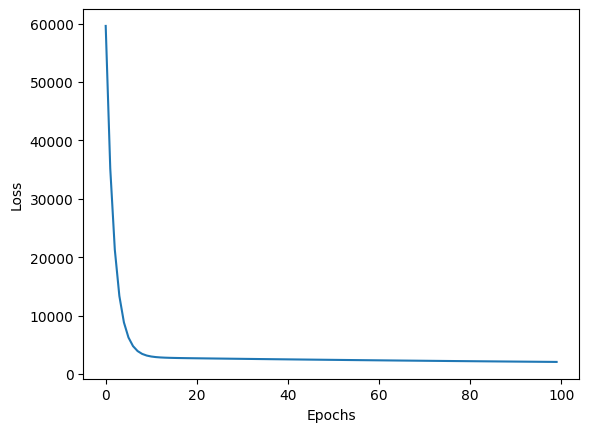

In [28]:
plt.plot(loasess_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## **Build Model with Keras**

In [29]:
df.head()

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261


In [30]:
x_data = df.iloc[:,[4, 5, 8]].values
y_data = df.iloc[:,-1].values

In [31]:
x_data.shape

(1046, 3)

In [33]:
y_data.shape

(1046,)

**Sequential**

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

1

In [5]:
model = Sequential()
model.add(Dense(units=3, activation='relu', input_shape=(3,)))
model.add(Dense(units=3, activation='relu',))
model.add(Dense(units=1))

d:\Shaher\AMIT\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2

In [49]:
model = Sequential([
    Input(shape=(3,)),
    Dense(3, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1)
])

In [50]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28 (112.00 B)

 Trainable params: 28 (112.00 B)

 Non-trainable params: 0 (0.00 B)

**compile**

In [51]:
model.compile(loss='mse', optimizer='sgd')

In [52]:
model.fit(x_data, y_data, epochs=50, batch_size=32)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9401001.0000
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 44823.2617
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14068.7910
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5729.5933 
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4107.3784
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3514.9336 
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3423.6572 
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3127.7395
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3044.5496 
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3306.1614 
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3306.6819
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3198.8020
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3191.9045 
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2921.2507
Epoch 15/50
33/33 ━━━━━━━━━━━━━━

**Functional**

In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

In [54]:
input_layer = Input(shape=(3,))

h1 = Dense(3, activation='relu')(input_layer)
h2 = Dense(3, activation='relu')(h1)

output_layer = Dense(1)(h2)

In [55]:
model = Model(inputs=input_layer, outputs=output_layer)

In [56]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28 (112.00 B)

 Trainable params: 28 (112.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(loss='mse', optimizer='sgd')

In [58]:
model.fit(x_data, y_data, epochs=50, batch_size=32)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76382.9297
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15365.4150
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6418.1660
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3918.9539
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3564.0364
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3168.8794
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3182.4019
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3065.3452
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3238.1042
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3345.8188
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3222.1609
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3057.4536
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3119.5652
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3244.1118
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s